In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA:

### reading the dataset:

In [2]:
df=pd.read_csv('adult.data.csv')

In [3]:
pd.set_option("display.max_columns",3000)
pd.set_option("display.max_rows",3000)

In [4]:
df

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,0,0,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,0,0,20,<=50K


### data info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   marrital status         32561 non-null  object
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  object
 6   capital gain            32561 non-null  int64 
 7   capital loss            32561 non-null  int64 
 8   working hours per week  32561 non-null  int64 
 9   salary                  32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


### data descriptive stats:

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marrital status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital gain,32561.0,NaN,NaN,NaN,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,NaN,NaN,NaN,87.30383,402.960219,0.0,0.0,0.0,0.0,4356.0
working hours per week,32561.0,NaN,NaN,NaN,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
salary,32561,2,<=50K,24720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### checking for duplicates:

In [7]:
dups=df.duplicated()
print('Number of duplicates rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicates rows = 5864
(32561, 10)


In [8]:
df.drop_duplicates(inplace=True)


In [9]:
dups=df.duplicated()
print('Number of duplicates rows = %d' % (dups.sum()))
print(df.shape)


Number of duplicates rows = 0
(26697, 10)


### Getting unique counts of all objects in dataset:

In [10]:
df.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marrital status', 'occupation', 'sex',
       'salary'],
      dtype='object')

In [11]:
df['workclass'].value_counts()# value_counts(normalize=True)*100 -----> gives percentage 

Private             17474
Self-emp-not-inc     2447
Local-gov            1980
?                    1519
State-gov            1246
Self-emp-inc         1089
Federal-gov           921
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()

Prof-specialty       3703
Exec-managerial      3531
Sales                3009
Craft-repair         2970
Adm-clerical         2884
Other-service        2626
?                    1526
Machine-op-inspct    1483
Transport-moving     1372
Handlers-cleaners    1033
Farming-fishing       951
Tech-support          841
Protective-serv       614
Priv-house-serv       145
Armed-Forces            9
Name: occupation, dtype: int64

### As we can see, there are '?' values in workclass&occupation, and we need to either drop or impute them

### Handling '?' values:

In [13]:
for col in df.columns:
 print(f'the percentage of null values of {col} is {round((df[col].isnull().sum()/df.shape[0]*100),2)}%')

the percentage of null values of age is 0.0%
the percentage of null values of workclass is 0.0%
the percentage of null values of education is 0.0%
the percentage of null values of marrital status is 0.0%
the percentage of null values of occupation is 0.0%
the percentage of null values of sex is 0.0%
the percentage of null values of capital gain is 0.0%
the percentage of null values of capital loss is 0.0%
the percentage of null values of working hours per week is 0.0%
the percentage of null values of salary is 0.0%


In [14]:
df[df=='?']=np.nan #converting '?' values to nan values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     26697 non-null  int64 
 1   workclass               25178 non-null  object
 2   education               26697 non-null  object
 3   marrital status         26697 non-null  object
 4   occupation              25171 non-null  object
 5   sex                     26697 non-null  object
 6   capital gain            26697 non-null  int64 
 7   capital loss            26697 non-null  int64 
 8   working hours per week  26697 non-null  int64 
 9   salary                  26697 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [16]:
for col in df.columns:
 print(f'the percentage of null values of {col} is {round((df[col].isnull().sum()/df.shape[0]*100),2)}%')

the percentage of null values of age is 0.0%
the percentage of null values of workclass is 5.69%
the percentage of null values of education is 0.0%
the percentage of null values of marrital status is 0.0%
the percentage of null values of occupation is 5.72%
the percentage of null values of sex is 0.0%
the percentage of null values of capital gain is 0.0%
the percentage of null values of capital loss is 0.0%
the percentage of null values of working hours per week is 0.0%
the percentage of null values of salary is 0.0%


### Data Visualization:

### UNIVARIATE:

In [17]:
def uniplot(col):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col],bins=20,kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

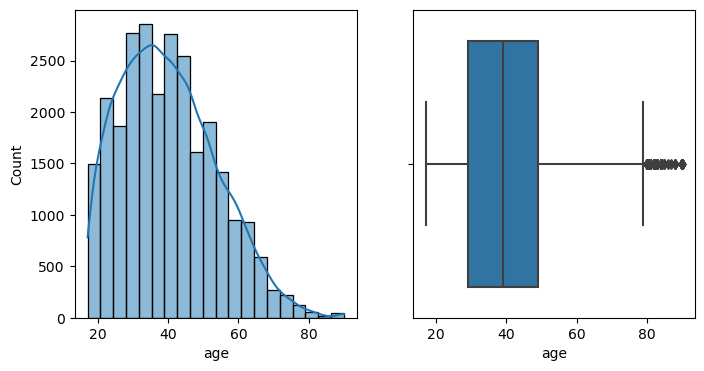

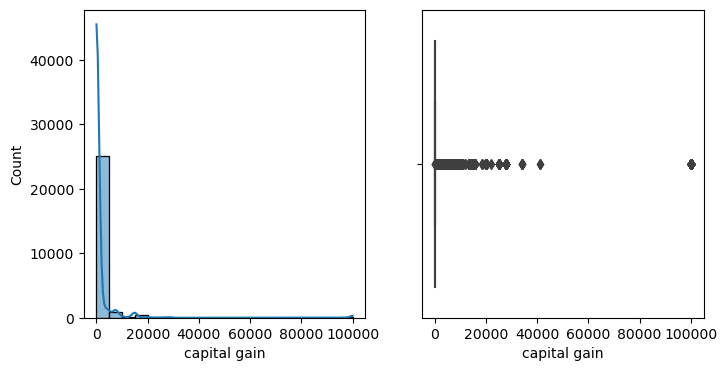

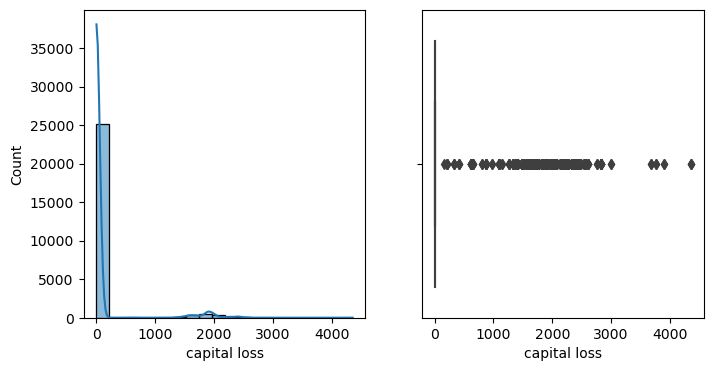

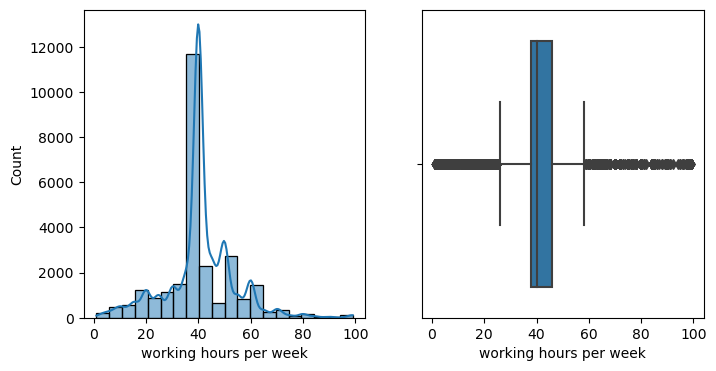

In [18]:
for col in df.select_dtypes(exclude='object'):
    uniplot(col)


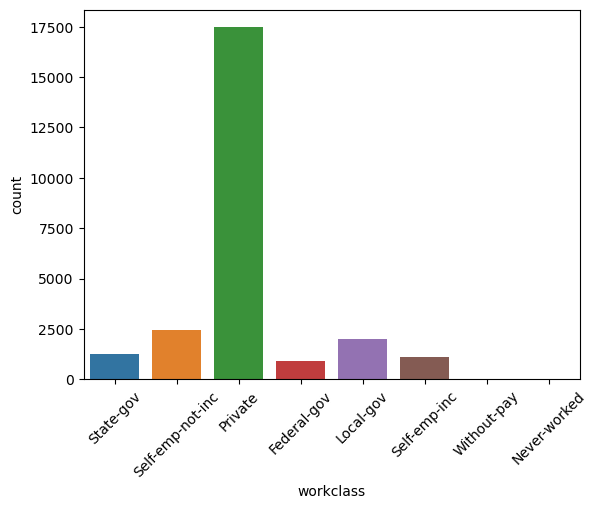

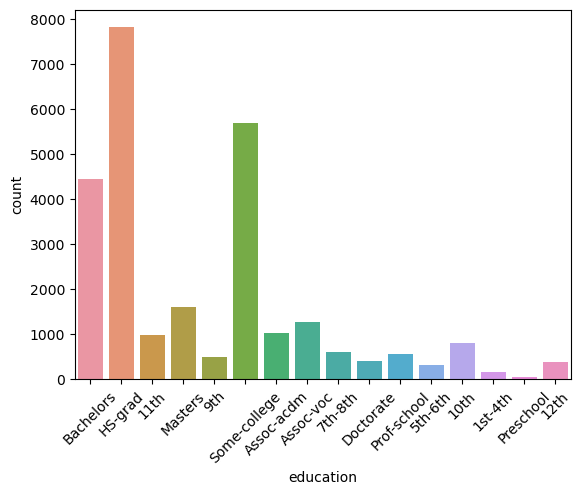

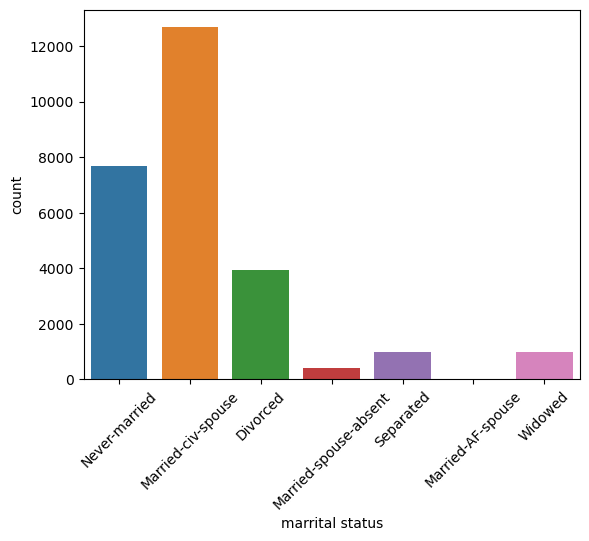

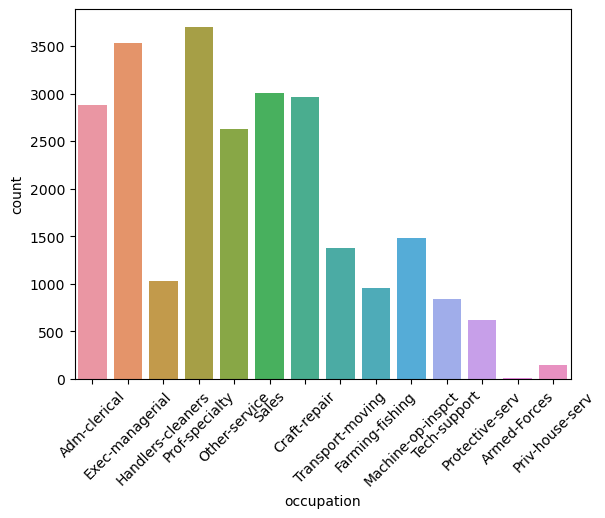

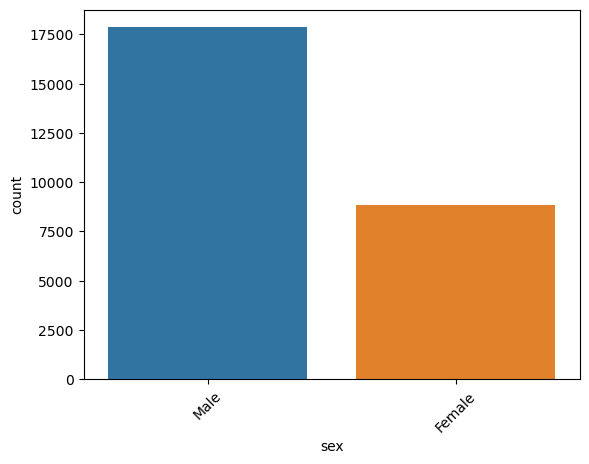

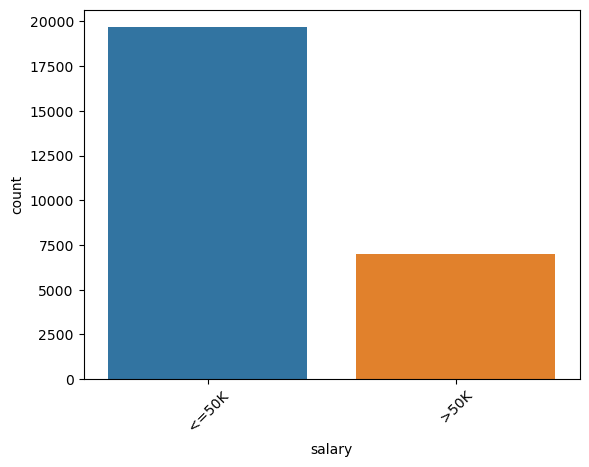

In [19]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.show()


### BIVARIATE:

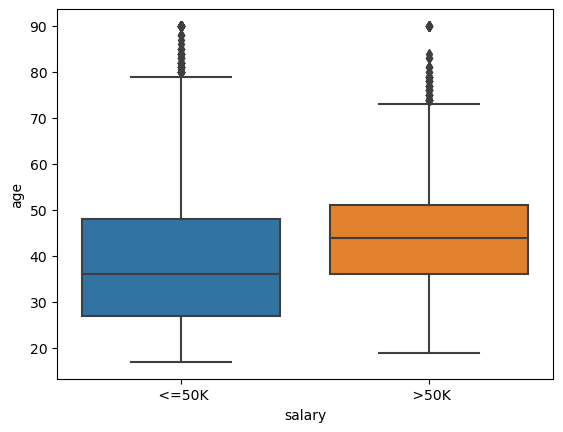

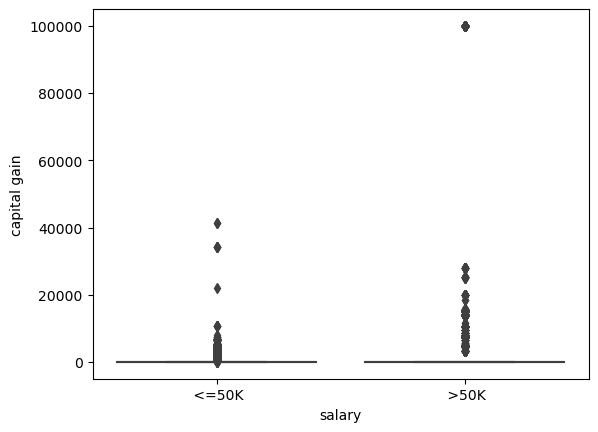

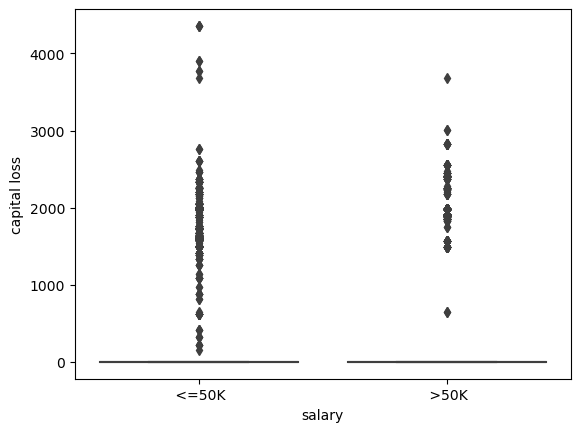

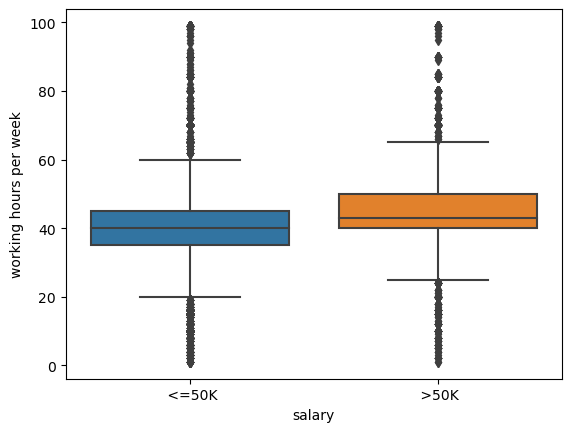

In [20]:
for col in df.select_dtypes(include='int64').columns:
    sns.boxplot(x=df['salary'],y=df[col])
    plt.show()


### MULTIVARIATE:

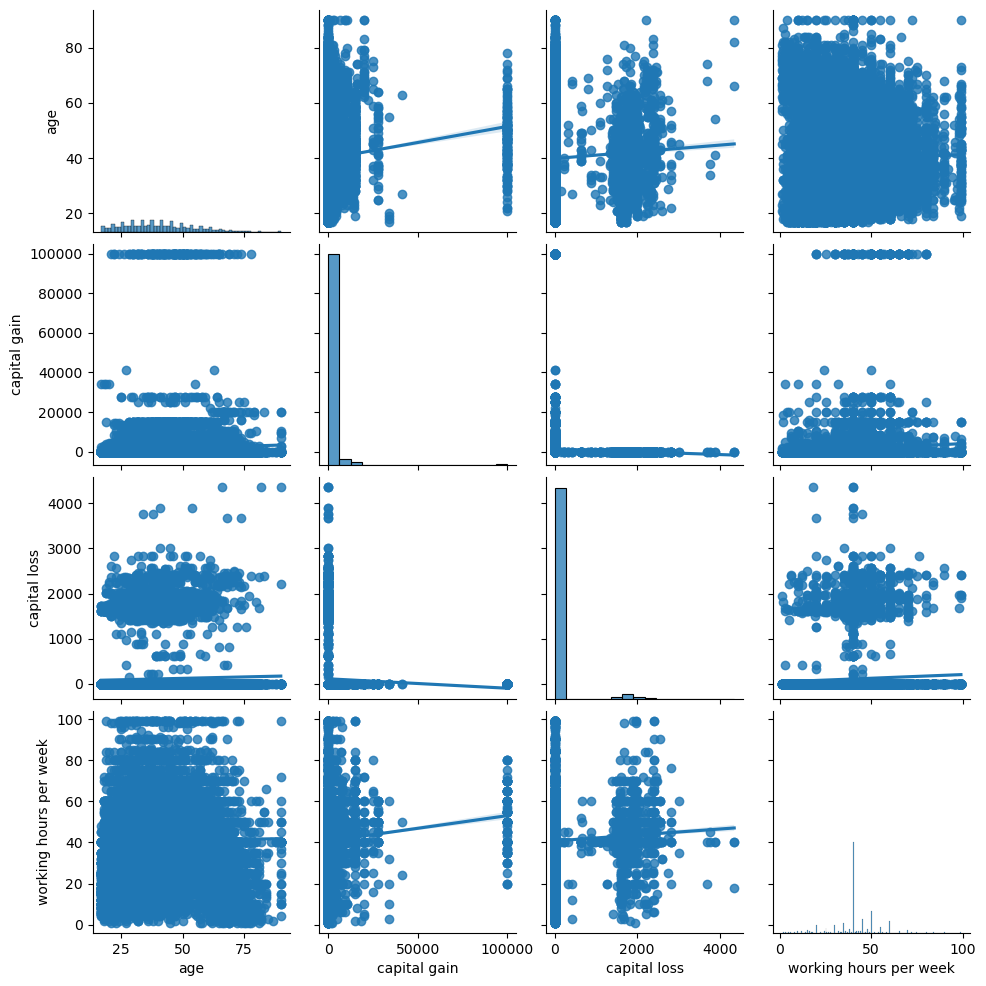

In [21]:
sns.pairplot(df,kind='reg')

C:\Users\ayush\AppData\Local\Temp\ipykernel_21024\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

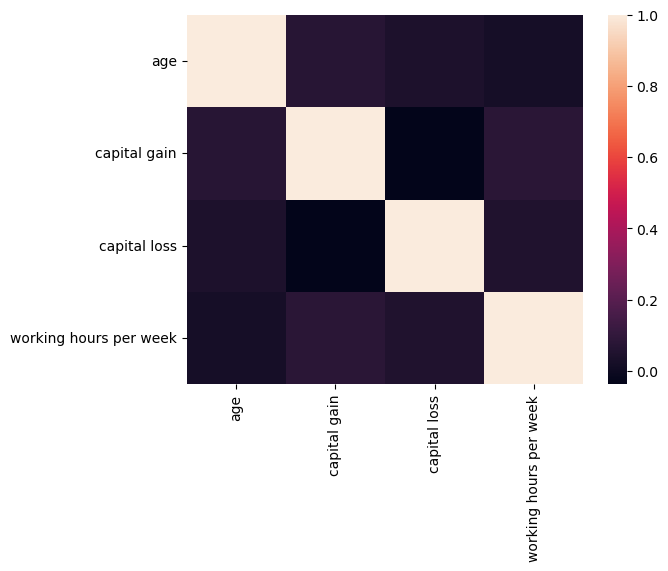

In [22]:
sns.heatmap(df.corr())

### IMPUTATION:

In [23]:
df.isnull().sum()

age                          0
workclass                 1519
education                    0
marrital status              0
occupation                1526
sex                          0
capital gain                 0
capital loss                 0
working hours per week       0
salary                       0
dtype: int64

In [24]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].replace(np.nan,df[col].mode()[0])

In [25]:
df.isnull().sum()

age                       0
workclass                 0
education                 0
marrital status           0
occupation                0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
salary                    0
dtype: int64

### Outlier detection & removal:

In [26]:
def remove_outliers(col):
    Q1=np.quantile(col,.25)
    Q3=np.quantile(col,.75)
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr,ur

In [27]:
lr,ur=remove_outliers(df['working hours per week'])

In [28]:
len(df['working hours per week'])

26697

In [29]:
df['working hours per week']>ur

0        False
1        False
2        False
3        False
4        False
         ...  
32554    False
32555    False
32556    False
32558    False
32560    False
Name: working hours per week, Length: 26697, dtype: bool

In [30]:
lr,ur

(26.0, 58.0)

In [31]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    upper_count = df[df[col] > upper_range][col].count()
    upper_percentage = upper_count/df.shape[0]*100
    lower_count = df[df[col] < lower_range][col].count()
    lower_percentage = lower_count/df.shape[0]*100
    return print(f'outlier percentage of {col} upper range is {ur}% and lower range is {lr}%')


In [32]:
for i in df.select_dtypes(exclude='object'):
    outliers_per(i)


outlier percentage of age upper range is 58.0% and lower range is 26.0%
outlier percentage of capital gain upper range is 58.0% and lower range is 26.0%
outlier percentage of capital loss upper range is 58.0% and lower range is 26.0%
outlier percentage of working hours per week upper range is 58.0% and lower range is 26.0%


In [33]:
lr,ur=remove_outliers(df['working hours per week'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['working hours per week']=np.where(df['working hours per week']>ur,ur,df['working hours per week'])
df['working hours per week']=np.where(df['working hours per week']<lr,lr,df['working hours per week'])

Lower Range : 26.0 
Upper Range : 58.0


### Dont remove outliers for capital gain & capital loss!

In [34]:
exclude_columns = ['capital gain', 'capital loss']
for column in df.select_dtypes(exclude='object').columns:
    if column not in exclude_columns:
        lr, ur = remove_outliers(df[column])
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])

In [35]:
def outliers(col):
    q1 = np.quantile(df[col],.25)
    q3 = np.quantile(df[col],.75)
    iqr=q3-q1
    lr=q1-(1.5*iqr)
    ur=q3+(1.5*iqr)
    lower_per=round(df[df[col]<lr][col].count()/df.shape[0],2)
    upper_per=round(df[df[col]>ur][col].count()/df.shape[0],2)
    return print(f'the outliers percentage of {col} for lower_range is {lower_per}, for upper_range is {upper_per}')


In [36]:
for i in df.select_dtypes(exclude='object').columns:
    outliers(i)

the outliers percentage of age for lower_range is 0.0, for upper_range is 0.0
the outliers percentage of capital gain for lower_range is 0.0, for upper_range is 0.1
the outliers percentage of capital loss for lower_range is 0.0, for upper_range is 0.06
the outliers percentage of working hours per week for lower_range is 0.0, for upper_range is 0.0


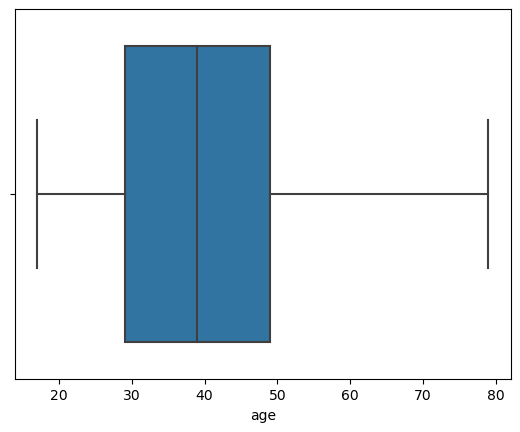

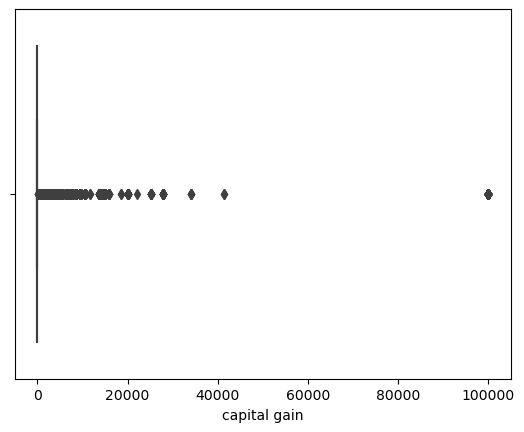

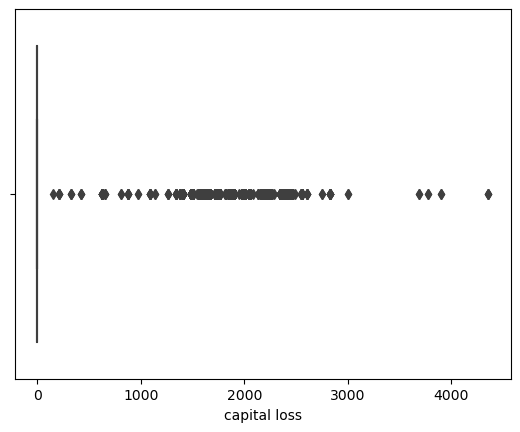

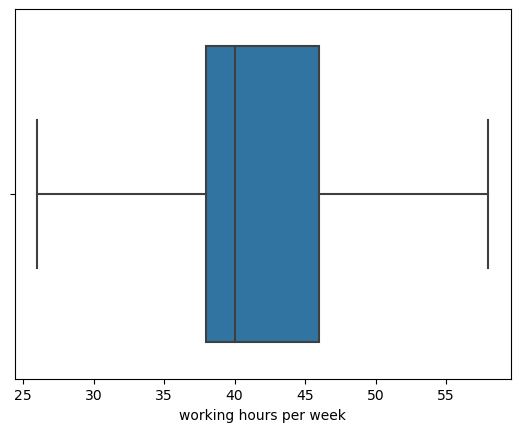

In [37]:
for col in df.select_dtypes(exclude='object').columns:
    sns.boxplot(x=df[col])
    plt.show()

In [38]:
df.corr()

C:\Users\ayush\AppData\Local\Temp\ipykernel_21024\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,capital gain,capital loss,working hours per week
age,1.000000,0.069342,0.039034,0.038187
capital gain,0.069342,1.000000,-0.038534,0.085196
capital loss,0.039034,-0.038534,1.000000,0.055047
working hours per week,0.038187,0.085196,0.055047,1.000000


In [39]:
df.describe()

,age,capital gain,capital loss,working hours per week
count,26697.000000,26697.000000,26697.000000,26697.000000
mean,39.961943,1304.600929,105.699330,41.169682
std,13.610029,8111.031099,441.214823,9.029725
min,17.000000,0.000000,0.000000,26.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,39.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,46.000000
max,79.000000,99999.000000,4356.000000,58.000000


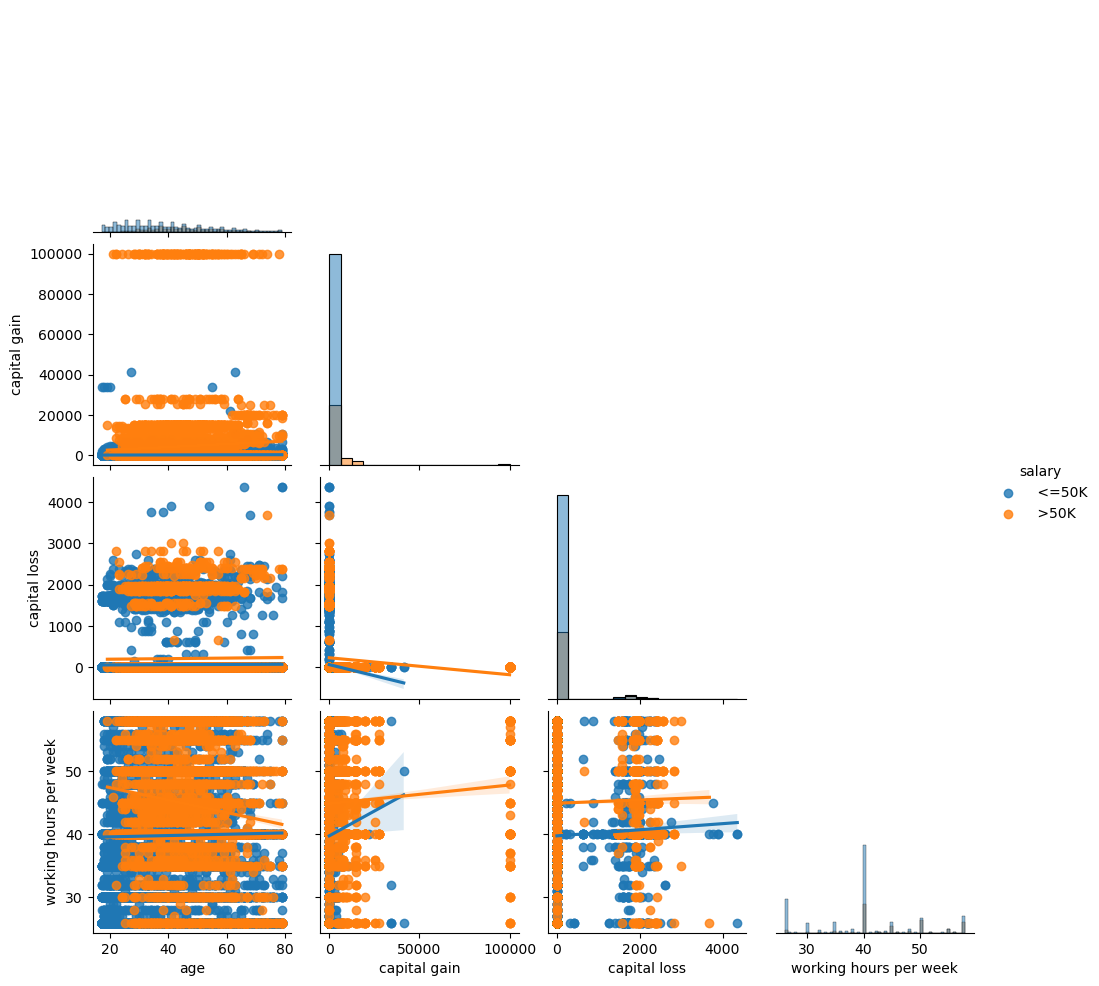

In [40]:
sns.pairplot(df,diag_kind='hist',hue='salary',corner=True,kind='reg')

In [41]:
df

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40.0,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,26.0,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40.0,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40.0,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...
32554,53.0,Private,Masters,Married-civ-spouse,Exec-managerial,Male,0,0,40.0,>50K
32555,22.0,Private,Some-college,Never-married,Protective-serv,Male,0,0,40.0,<=50K
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38.0,<=50K
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40.0,<=50K


### ENCODING

In [42]:
for col in df.select_dtypes(include='object'):
    df[col]=pd.Categorical(df[col]).codes

In [43]:
df

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39.0,6,9,4,0,1,2174,0,40.0,0
1,50.0,5,9,2,3,1,0,0,26.0,0
2,38.0,3,11,0,5,1,0,0,40.0,0
3,53.0,3,1,2,5,1,0,0,40.0,0
4,28.0,3,9,2,9,0,0,0,40.0,0
...,...,...,...,...,...,...,...,...,...,...
32554,53.0,3,12,2,3,1,0,0,40.0,1
32555,22.0,3,15,4,10,1,0,0,40.0,0
32556,27.0,3,7,2,12,0,0,0,38.0,0
32558,58.0,3,11,6,0,0,0,0,40.0,0


### Applying Logistic Reg

In [44]:
X=df.drop('salary',axis=1)
y=df.pop('salary')

In [45]:
X.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week
0,39.0,6,9,4,0,1,2174,0,40.0
1,50.0,5,9,2,3,1,0,0,26.0
2,38.0,3,11,0,5,1,0,0,40.0
3,53.0,3,1,2,5,1,0,0,40.0
4,28.0,3,9,2,9,0,0,0,40.0


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int8

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [49]:
X_train.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week
24738,57.0,3,12,2,9,1,0,0,55.0
12587,25.0,3,9,4,3,1,0,0,45.0
24532,30.0,3,11,4,9,1,0,0,30.0
29961,24.0,3,11,5,7,0,0,0,40.0
31051,41.0,3,15,0,12,0,0,0,36.0


In [50]:
y_train.head()

24738    1
12587    0
24532    0
29961    0
31051    0
Name: salary, dtype: int8

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
X_test

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week
19135,19.0,3,1,4,4,1,0,0,26.0
22887,50.0,5,9,0,9,0,0,0,58.0
1334,51.0,3,8,2,9,1,0,0,40.0
15220,62.0,3,12,2,9,1,0,0,50.0
10887,44.0,3,9,2,12,0,0,0,26.0
...,...,...,...,...,...,...,...,...,...
12054,53.0,1,12,0,9,0,0,0,50.0
4389,32.0,4,11,2,2,1,99999,0,40.0
569,47.0,3,12,0,3,1,0,0,42.0
29473,19.0,3,1,5,7,0,0,0,40.0


In [55]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [56]:
lr.score(X_test,y_test)*100

79.08296447622291